# Decision Trees

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [6]:
filename = "cleaned_dataset.csv"

df = pd.read_csv(filename)

print(df)
print(df.dtypes)

      is_clean                                       product_name  \
0            1                        Hydrating Lip Treatment Oil   
1            1                  Skin-Enhancing Tinted Moisturizer   
2            1   Lash-Amplifying Volumizing & Lengthening Mascara   
3            1           Skin Melt Talc-Free Loose Setting Powder   
4            1                    Light-Catching Highlighter Balm   
...        ...                                                ...   
1189         0                  Lash Clash Extreme Volume Mascara   
1190         0                     The Bold High Pigment Lipstick   
1191         0     NU LIP & CHEEK BALMY TINT with Hyaluronic Acid   
1192         0  NU GLOW IN BALM Face Priming Moisturizer with ...   
1193         0  NU BLOTTING LOTION Pore Minimizer & Mattifying...   

              brand_name  size  loves_count  number_of_reviews  rating  \
0               Ami Colé  0.15        22871                397  4.3401   
1               Ami Col

In [7]:
# prepaing the data for modeling

# vectorize 'ingredient_description'
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['ingredient_description'].fillna(''))
y = df['is_clean']

# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Sample of training data (X_train):")
print(X_train[:5].toarray())
print("Sample of testing data (X_test):")
print(X_test[:5].toarray())

Sample of training data (X_train):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sample of testing data (X_test):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


Model 1:
Accuracy: 0.97
Confusion Matrix:
 [[189   5]
 [  3  42]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       194
           1       0.89      0.93      0.91        45

    accuracy                           0.97       239
   macro avg       0.94      0.95      0.95       239
weighted avg       0.97      0.97      0.97       239



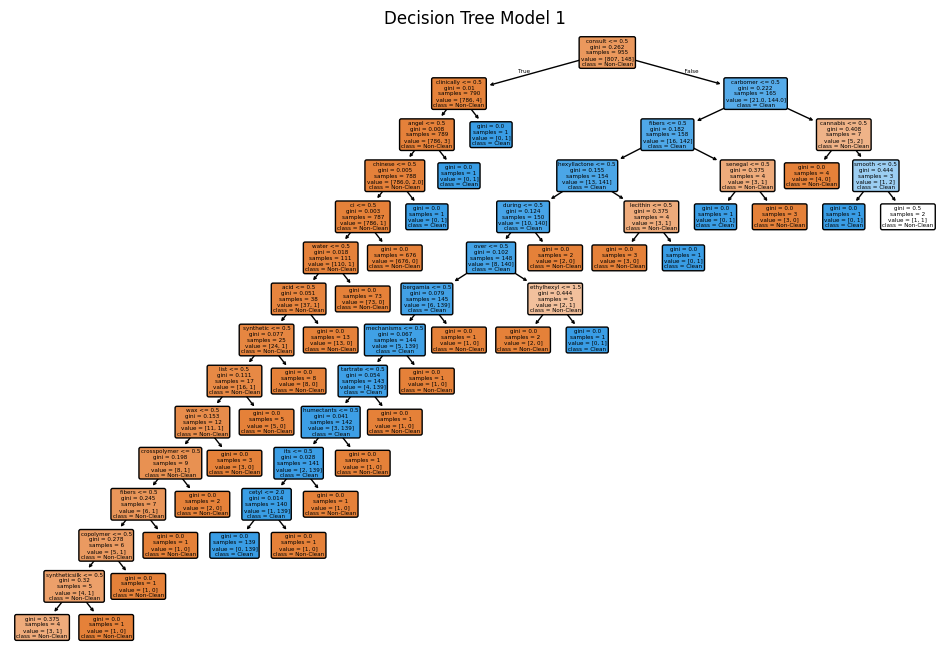

Model 2:
Accuracy: 0.97
Confusion Matrix:
 [[189   5]
 [  2  43]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       194
           1       0.90      0.96      0.92        45

    accuracy                           0.97       239
   macro avg       0.94      0.96      0.95       239
weighted avg       0.97      0.97      0.97       239



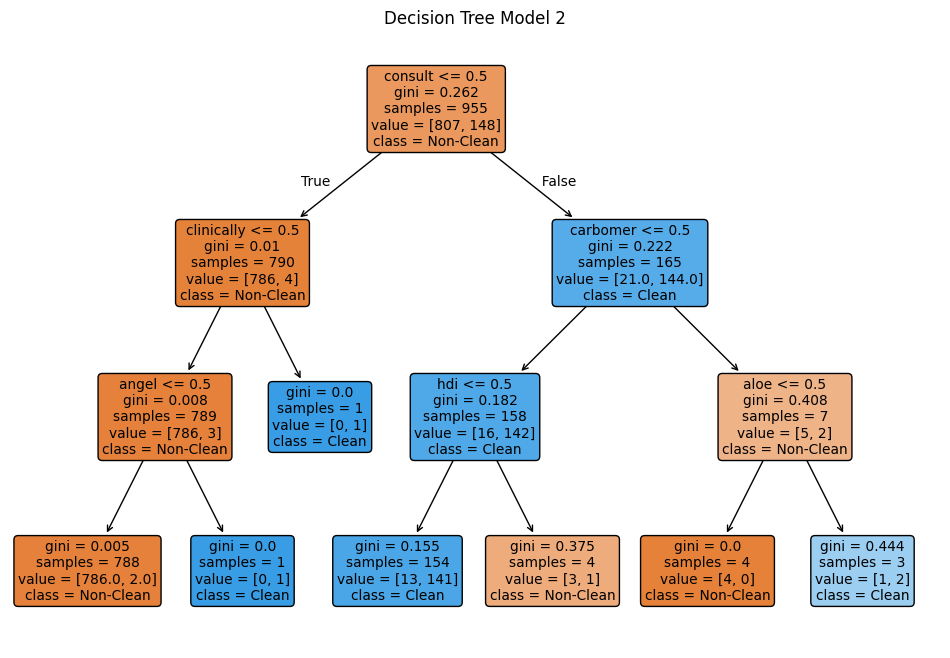

Model 3:
Accuracy: 0.95
Confusion Matrix:
 [[189   5]
 [  7  38]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       194
           1       0.88      0.84      0.86        45

    accuracy                           0.95       239
   macro avg       0.92      0.91      0.92       239
weighted avg       0.95      0.95      0.95       239



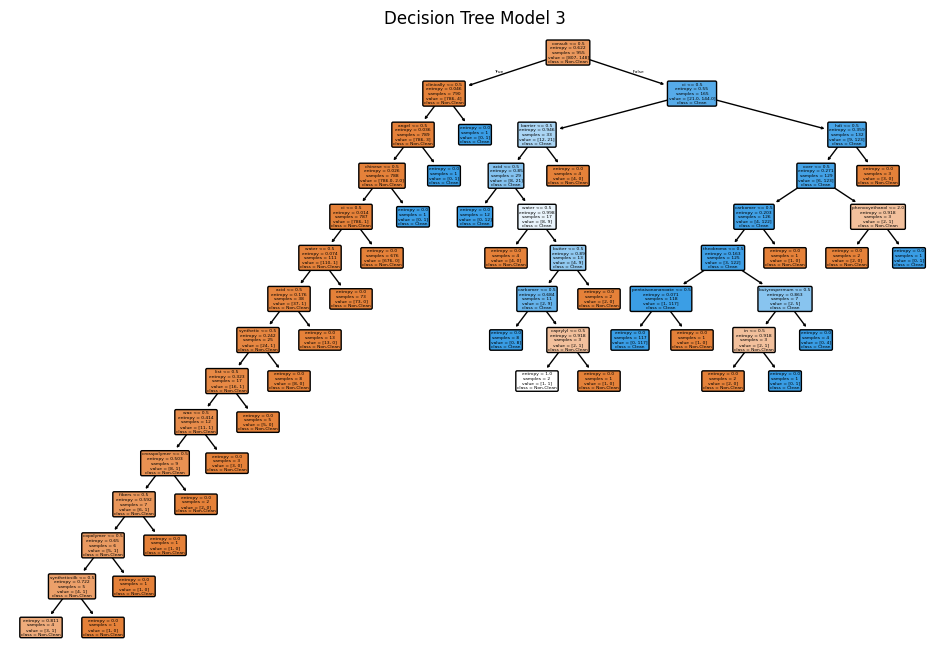

In [8]:
# Applying the decision trees

results = []

# Model 1: Default settings
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train, y_train)
y_pred1 = dt1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
results.append((dt1, accuracy1, conf_matrix1))

# Model 2: Limit max depth to encourage different root splits
dt2 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt2.fit(X_train, y_train)
y_pred2 = dt2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
results.append((dt2, accuracy2, conf_matrix2))

# Model 3: Use entropy criterion for different split strategy
dt3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt3.fit(X_train, y_train)
y_pred3 = dt3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
results.append((dt3, accuracy3, conf_matrix3))

# visualize the results
for i, (model, accuracy, conf_matrix) in enumerate(results, start=1):
    print(f"Model {i}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print(classification_report(y_test, model.predict(X_test)))

    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=['Non-Clean', 'Clean'], rounded=True)
    plt.title(f"Decision Tree Model {i}")
    plt.show()
